In [39]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import BayesianRidge, LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('all.csv', engine='python')


In [86]:
from sklearn import linear_model
from sklearn import metrics


In [52]:
array = dataset.values
dataset.data = array[:,0:1]
dataset.target = array[:,2]

In [142]:
X = dataset[['id','seg']].values
_, num_X = X.shape
Y = dataset[['vol']].values
_, num_Y = Y.shape

In [137]:
X = dataset[['seg']].values
_, num_X = X.shape
X2 = dataset[['id']].values
_, num_X2 = X2.shape
Y = dataset[['vol']].values
_, num_Y = Y.shape

In [109]:
X = [dataset.id.values,dataset.seg.values]
Y = dataset.vol.values

In [110]:
X

[array([ 1,  2,  3,  4, ..., 48, 49, 50, 51]),
 array([ 1,  1,  1,  1, ..., 20, 20, 20, 20])]

In [105]:
reg = linear_model.BayesianRidge()

In [143]:
reg.fit(X, Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [125]:
reg.fit(X,Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [126]:
reg.predict (X)

array([ 5.79,  5.74,  5.7 ,  5.66, ...,  4.54,  4.49,  4.45,  4.4 ])

In [53]:
reg.fit(dataset.data, dataset.target)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [127]:
print(reg)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)


In [128]:
expected = Y

In [129]:
predicted = reg.predict(X)

In [151]:
predicted

array([ 5.79,  5.74,  5.7 ,  5.66, ...,  4.54,  4.49,  4.45,  4.4 ])

In [63]:
df = pandas.DataFrame(expected, predicted)

In [67]:
df1= pandas.DataFrame(X,Y)

In [74]:
final = pandas.merge(dataset, predicted, left_index=True, right_index=True, how='outer')

ValueError: can not merge DataFrame with instance of type <type 'numpy.ndarray'>

In [164]:
s1 = pandas.DataFrame([dataset.id.values, dataset.seg.values, dataset.vol.values], index=['id', 'seg', 'vol'], name='s1')
s2 = pandas.DataFrame([expected, predicted], index=['exp', 'pred'], name='s2')

TypeError: __init__() got an unexpected keyword argument 'name'

In [187]:
s2 = pandas.DataFrame(expected)
s3 = pandas.DataFrame(predicted)

In [200]:
f=pandas.concat([dataset, s2, s3], axis=1).reset_index()

In [218]:
pandas.DataFrame.to_csv(f, sep = ',')

',index,id,seg,vol,0,0\n0,0,1,1,0.319597062,0.319597062,5.78656329686\n1,1,2,1,0.230463472,0.230463472,5.74312390102\n2,2,3,1,0.412305802,0.412305802,5.69968450517\n3,3,4,1,0.337676846,0.337676846,5.65624510933\n4,4,5,1,0.396647991,0.396647991,5.61280571349\n5,5,6,1,0.303053515,0.303053515,5.56936631765\n6,6,7,1,1.922984738,1.922984738,5.52592692181\n7,7,8,1,4.248143913,4.248143913,5.48248752597\n8,8,9,1,3.224658618,3.224658618,5.43904813013\n9,9,10,1,4.50670929,4.50670929,5.39560873428\n10,10,11,1,4.394291976,4.394291976,5.35216933844\n11,11,12,1,4.709754008,4.709754008,5.3087299426\n12,12,13,1,3.823438087,3.823438087,5.26529054676\n13,13,14,1,5.425965604,5.425965604,5.22185115092\n14,14,15,1,5.043579202,5.043579202,5.17841175508\n15,15,16,1,3.589699514,3.589699514,5.13497235924\n16,16,17,1,3.62160427,3.62160427,5.09153296339\n17,17,18,1,4.86980951,4.86980951,5.04809356755\n18,18,19,1,3.839312733,3.839312733,5.00465417171\n19,19,20,1,4.711361206,4.711361206,4.96121477587\n20,20,21,1,3

In [211]:
%bash
pwd

/content/datalab/notebooks


In [201]:
print(f)

      index  id  seg       vol         0         0
0         0   1    1  0.319597  0.319597  5.786563
1         1   2    1  0.230463  0.230463  5.743124
2         2   3    1  0.412306  0.412306  5.699685
3         3   4    1  0.337677  0.337677  5.656245
4         4   5    1  0.396648  0.396648  5.612806
5         5   6    1  0.303054  0.303054  5.569366
6         6   7    1  1.922985  1.922985  5.525927
7         7   8    1  4.248144  4.248144  5.482488
8         8   9    1  3.224659  3.224659  5.439048
9         9  10    1  4.506709  4.506709  5.395609
10       10  11    1  4.394292  4.394292  5.352169
11       11  12    1  4.709754  4.709754  5.308730
12       12  13    1  3.823438  3.823438  5.265291
13       13  14    1  5.425966  5.425966  5.221851
14       14  15    1  5.043579  5.043579  5.178412
15       15  16    1  3.589700  3.589700  5.134972
16       16  17    1  3.621604  3.621604  5.091533
17       17  18    1  4.869810  4.869810  5.048094
18       18  19    1  3.839313 

In [182]:
s2 = pandas.DataFrame({'$exp':[expected], '$pred': [predicted]})

In [184]:
s2.columns = ['exp', 'pred']

In [185]:
print(s2)

                                                 exp  \
0  [[0.319597062], [0.230463472], [0.412305802], ...   

                                                pred  
0  [5.78656329686, 5.74312390102, 5.69968450517, ...  


In [186]:
s2

,exp,pred
0,"[[0.319597062], [0.230463472], [0.412305802], ...","[5.78656329686, 5.74312390102, 5.69968450517, ..."


In [157]:
df1= pandas.DataFrame(s1)

In [159]:
s1

id     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
seg    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
vol    [0.319597062, 0.230463472, 0.412305802, 0.3376...
Name: s1, dtype: object

In [156]:
pandas.concat([s1, s2], axis=1)

,s1,s2
exp,NaN,"[[0.319597062], [0.230463472], [0.412305802], ..."
id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN
pred,NaN,"[5.78656329686, 5.74312390102, 5.69968450517, ..."
seg,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
vol,"[0.319597062, 0.230463472, 0.412305802, 0.3376...",NaN


In [87]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

ValueError: Unknown label type: (array([ 0.32,  0.23,  0.41,  0.34, ...,  1.57,  1.57,  1.57,  1.53]), array([ 6.12,  6.08,  6.04,  6.  , ...,  4.19,  4.15,  4.11,  4.07]))

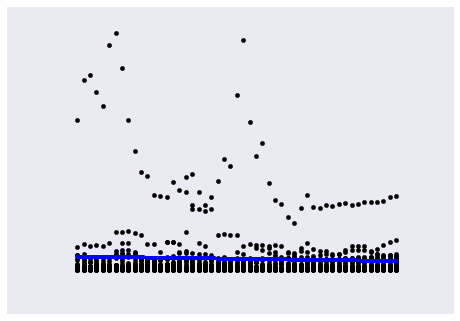

In [93]:
plt.scatter(X, Y,  color='black')
plt.plot(X, reg.predict(X), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()